In [1]:
%matplotlib inline

import os.path as fs
from PIL import Image
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

try:
    import cPickle as pickle
except:
    import pickle

DATA_DIR = '../data'

WIKI_CROPS_DIR = "wiki_crop"
IMDB_CROPS_DIR = "imdb_crop"

WIKI_META_OBJ = 'wiki_meta.obj'
IMDB_META_OBJ = 'imdb_meta.obj'

np.random.seed(42)

In [44]:
lmap = lambda f, l: list(map(f, l))
lfilter = lambda f, l: list(filter(f, l))

def merge_meta_data(data1, data2):
    return {
        'path':   np.append(data1['path'], data2['path']),
        'name':   np.append(data1['name'], data2['name']),
        'age':    np.append(data1['age'], data2['age']),
        'gender': np.append(data1['gender'], data2['gender'])
    }

def filter_meta_data(data, filter_mask):
    return {
        'path':   data['path'][filter_mask].reshape(-1),
        'name':   data['name'][filter_mask].reshape(-1),
        'age':    data['age'][filter_mask].reshape(-1),
        'gender': data['gender'][filter_mask].reshape(-1)
    }

def shuffle_meta_data(data):
    idx = np.arange(len(data['age']))
    rand_idx = np.random.shuffle(idx)
    return filter_meta_data(data, rand_idx)

def split_meta_data(data, f=0.1):
    intermediate = int(float(len(data['age'])) * f)
    idx1 = np.arange(intermediate)
    idx2 = np.arange(intermediate, len(data['age']))
    return filter_meta_data(data, idx1), filter_meta_data(data, idx2)

def to_bins(data, bins):
    bin_labels = lmap(lambda b: '%s-%s' % b, bins)
    binarize = lambda x: bins.index(next(filter(lambda e: x >= e[0] and x <= e[1], bins)))
    binarize_vec = np.vectorize(binarize)
    return binarize_vec(data), bin_labels
    
def plot_histo(data, bins=30, range=(0,100), figsize=(10,5), xticks=None, xlabel=None, ylabel=None, title=None):
    hist, bin_edges = np.histogram(data, bins=bins, range=range)

    plt.figure(figsize=figsize)
    plt.bar(bin_edges[:-1], hist, width=1)
    plt.xlim(min(bin_edges), max(bin_edges))
    if xticks is not None:
        plt.xticks(np.arange(len(xticks)) + 0.5, xticks)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)
    plt.show()

# Load combined data

In [30]:
with open(fs.join(DATA_DIR, WIKI_META_OBJ), 'rb') as file:
    wiki_meta = pickle.load(file)
    
with open(fs.join(DATA_DIR, IMDB_META_OBJ), 'rb') as file:
    imdb_meta = pickle.load(file)

meta_all = merge_meta_data(imdb_meta, wiki_meta)

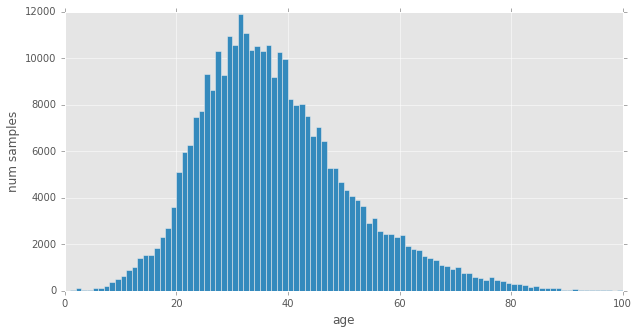

In [31]:
plot_histo(meta_all['age'], bins=100, xlabel='age', ylabel='num samples')

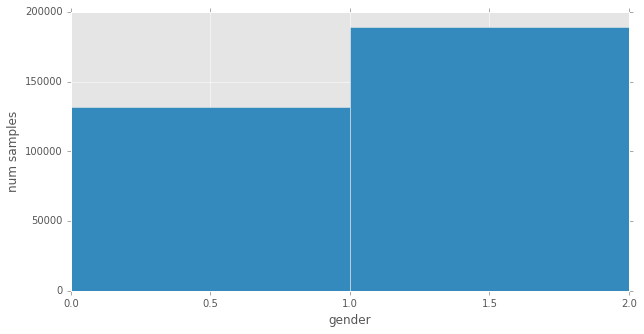

In [32]:
plot_histo(meta_all['gender'], bins=(0,1,2), xlabel='gender', ylabel='num samples')

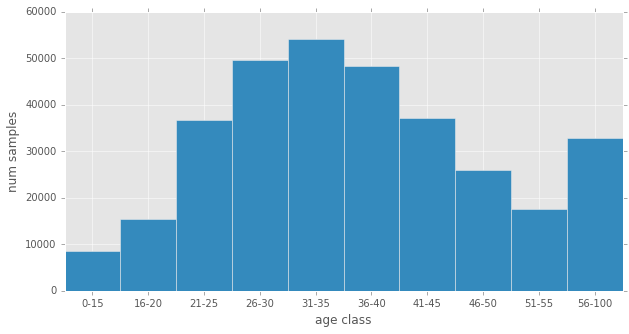

In [33]:
age_classes = [(0,15),(16,20),(21,25),(26,30),(31,35),(36,40),(41,45),(46,50),(51,55),(56,100)]

age_binned, age_labels = to_bins(meta_all['age'], age_classes)

plot_histo(age_binned, bins=range(len(age_labels) + 1), xticks=age_labels, xlabel='age class', ylabel='num samples')

In [40]:
meta_all_shuffled = shuffle_meta_data(meta_all)

train, test = split_meta_data(meta_all_shuffled, 0.8)
train, val = split_meta_data(train, 0.9)

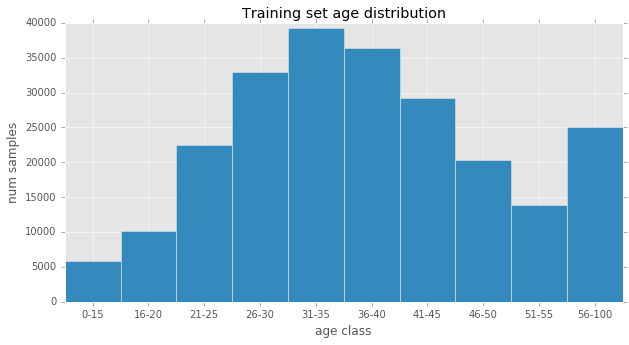

In [47]:
age_binned, age_labels = to_bins(train['age'], age_classes)
plot_histo(age_binned, bins=range(len(age_labels) + 1), xticks=age_labels,
           xlabel='age class', ylabel='num samples', title='Training set age distribution')

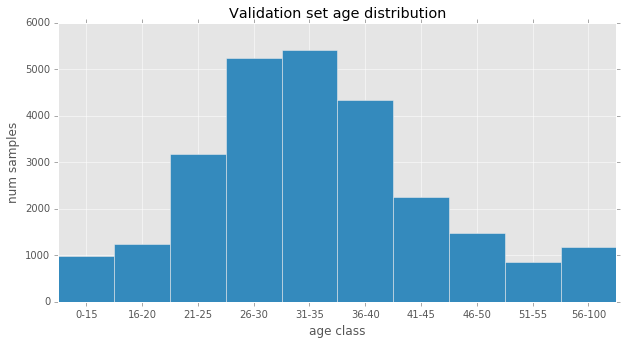

In [48]:
age_binned, age_labels = to_bins(val['age'], age_classes)
plot_histo(age_binned, bins=range(len(age_labels) + 1), xticks=age_labels,
           xlabel='age class', ylabel='num samples', title='Validation set age distribution')

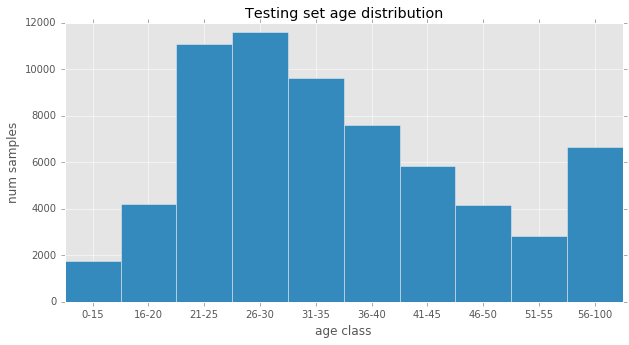

In [49]:
age_binned, age_labels = to_bins(test['age'], age_classes)
plot_histo(age_binned, bins=range(len(age_labels) + 1), xticks=age_labels,
           xlabel='age class', ylabel='num samples', title='Testing set age distribution')